In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd


## LOAD Penguins Dataset


In [25]:
penguins = sns.load_dataset("penguins")
print(penguins)
penguins.shape

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

(344, 7)

## **Missing data**


### Count missing data

In [3]:

missing_data = penguins.isna().sum()

print("Số lượng dữ liệu bị thiếu trong từng cột:")
print(missing_data)




Số lượng dữ liệu bị thiếu trong từng cột:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


### Handle missing data

#### *Firstly, visualize the feature that have missing data*

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26036\548817473.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=penguins, x='sex', palette='viridis')


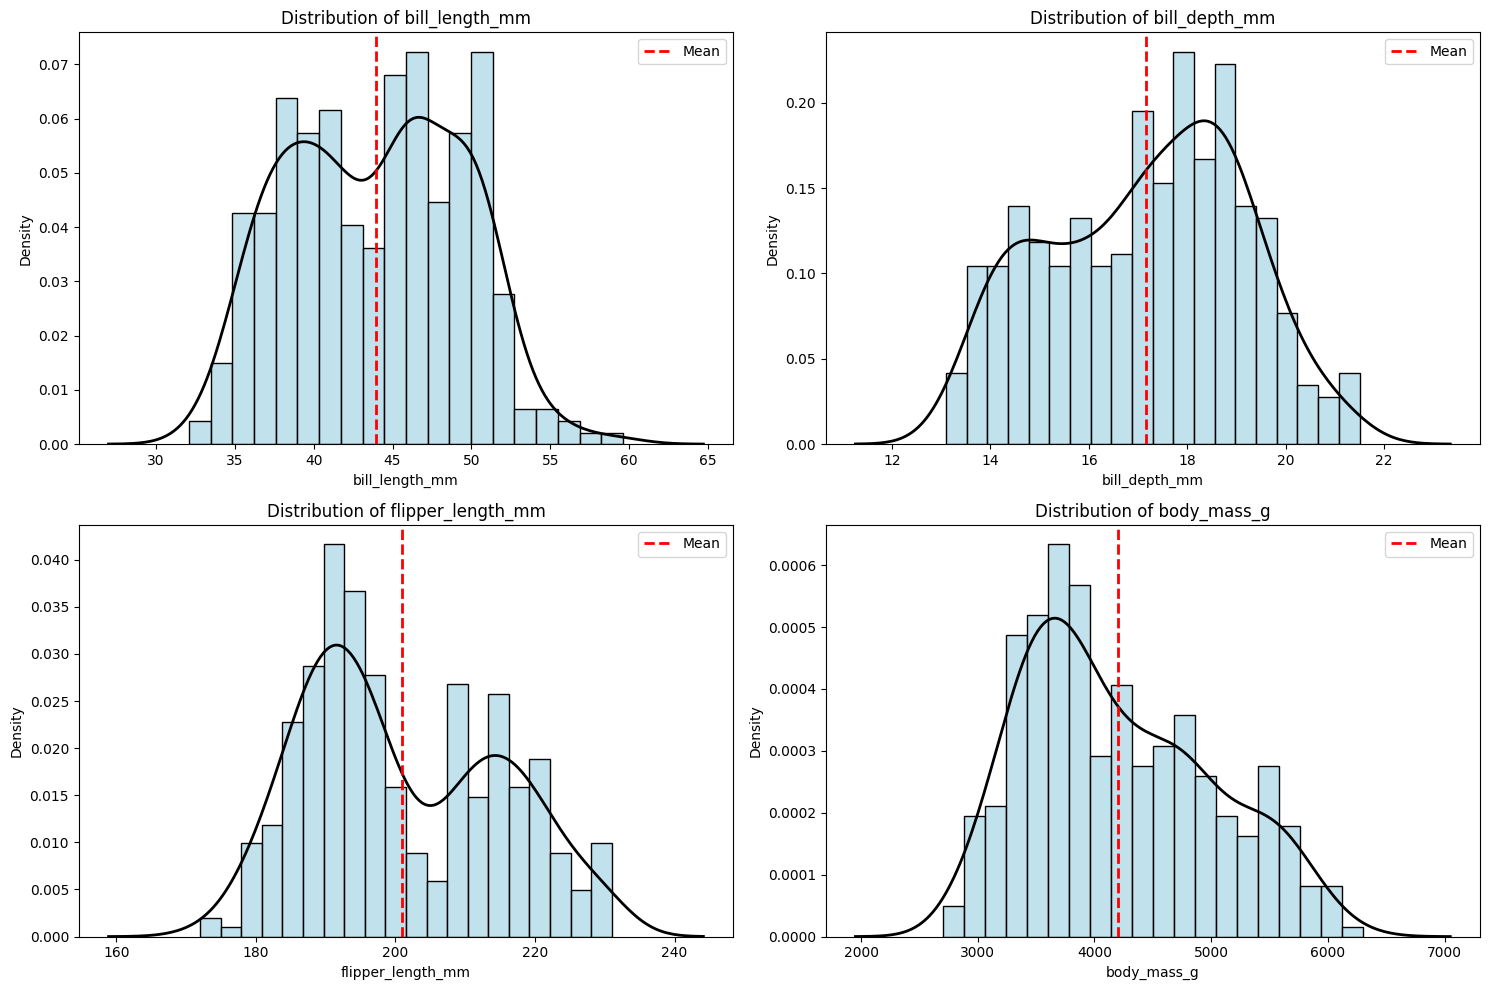

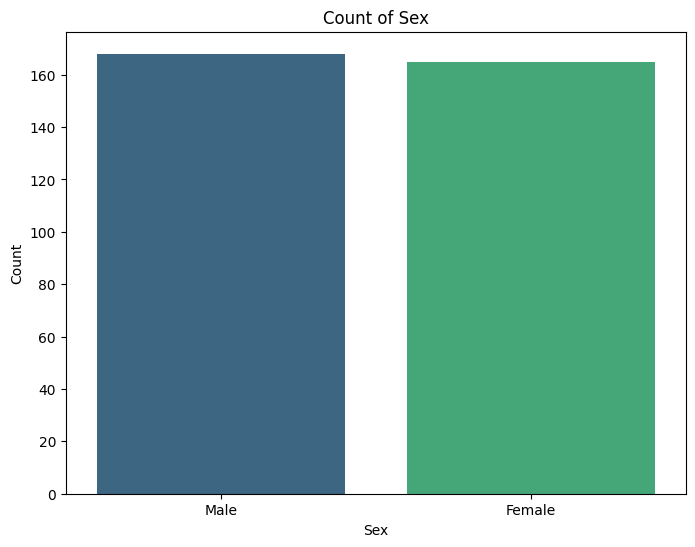

In [4]:
# Danh sách các feature cần vẽ
features_mm = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Tạo subplots
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_mm):
    plt.subplot(2, 2, i + 1)  # 2 hàng, 2 cột
    # Vẽ histogram
    sns.histplot(penguins[feature], bins=20, color='lightblue', edgecolor='black', stat='density')
    # Vẽ đường KDE
    sns.kdeplot(penguins[feature], color='black', linewidth=2)  # Đặt màu đường KDE là đen
    
    # Tính và vẽ đường trung bình
    mean_value = penguins[feature].mean()
    plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label='Mean')  # Thanh ngang màu đỏ
    
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()  # Hiện thị chú thích

plt.tight_layout()  # Đảm bảo các biểu đồ không chồng lên nhau



plt.figure(figsize=(8, 6))
sns.countplot(data=penguins, x='sex', palette='viridis')
# Thiết lập tiêu đề và nhãn
plt.title('Count of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.show()


### *Secondly, fill missing data*


##### Using simple-imputer to fill missing data

###### Using simple-imputer with mean() and mode()

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
#Tạo ra bản sao để không làm thay đổi dữ liệu gốc
penguins_copy_mean = penguins.copy()
# Tạo SimpleImputer cho các cột số
mean_imputer = SimpleImputer(strategy='mean')

# Thay thế các giá trị bị thiếu cho các cột số trong bản sao
penguins_copy_mean[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = mean_imputer.fit_transform(
penguins_copy_mean[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
)

# Tạo SimpleImputer cho các cột phân loại
mode_imputer = SimpleImputer(strategy='most_frequent')
penguins_copy_mean['sex'] = mode_imputer.fit_transform(penguins_copy_mean[['sex']]).flatten()

# Chuyển đổi giá trị phân loại thành số
label_encoder = LabelEncoder()
penguins_copy_mean['sex'] = label_encoder.fit_transform(penguins_copy_mean['sex'])

# In ra DataFrame đã xử lý
print(penguins_copy_mean)

#check 
penguins_copy_mean.isna().sum()


    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen        39.10000       18.70000         181.000000   
1    Adelie  Torgersen        39.50000       17.40000         186.000000   
2    Adelie  Torgersen        40.30000       18.00000         195.000000   
3    Adelie  Torgersen        43.92193       17.15117         200.915205   
4    Adelie  Torgersen        36.70000       19.30000         193.000000   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe        43.92193       17.15117         200.915205   
340  Gentoo     Biscoe        46.80000       14.30000         215.000000   
341  Gentoo     Biscoe        50.40000       15.70000         222.000000   
342  Gentoo     Biscoe        45.20000       14.80000         212.000000   
343  Gentoo     Biscoe        49.90000       16.10000         213.000000   

     body_mass_g  sex  
0    3750.000000    1  
1    3800.000000    0  
2    3250.00000

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

###### Using simple-imputer with median() and mode()

In [6]:
#Tạo ra bản sao để không làm thay đổi dữ liệu gốc
penguins_copy_median = penguins.copy()
# Tạo SimpleImputer cho các cột số
median_imputer = SimpleImputer(strategy='median')

# Thay thế các giá trị bị thiếu cho các cột số trong bản sao
penguins_copy_median[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = median_imputer.fit_transform(
penguins_copy_median[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
)

# Tạo SimpleImputer cho các cột phân loại
mode_imputer = SimpleImputer(strategy='most_frequent')
penguins_copy_median['sex'] = mode_imputer.fit_transform(penguins_copy_median[['sex']]).flatten()

# Chuyển đổi giá trị phân loại thành số
label_encoder = LabelEncoder()
penguins_copy_median['sex'] = label_encoder.fit_transform(penguins_copy_median['sex'])

# In ra DataFrame đã xử lý
print(penguins_copy_median)

#check 
penguins_copy_median.isna().sum()


    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen           39.10           18.7              181.0   
1    Adelie  Torgersen           39.50           17.4              186.0   
2    Adelie  Torgersen           40.30           18.0              195.0   
3    Adelie  Torgersen           44.45           17.3              197.0   
4    Adelie  Torgersen           36.70           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe           44.45           17.3              197.0   
340  Gentoo     Biscoe           46.80           14.3              215.0   
341  Gentoo     Biscoe           50.40           15.7              222.0   
342  Gentoo     Biscoe           45.20           14.8              212.0   
343  Gentoo     Biscoe           49.90           16.1              213.0   

     body_mass_g  sex  
0         3750.0    1  
1         3800.0    0  
2         3250.

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

##### **Compare**

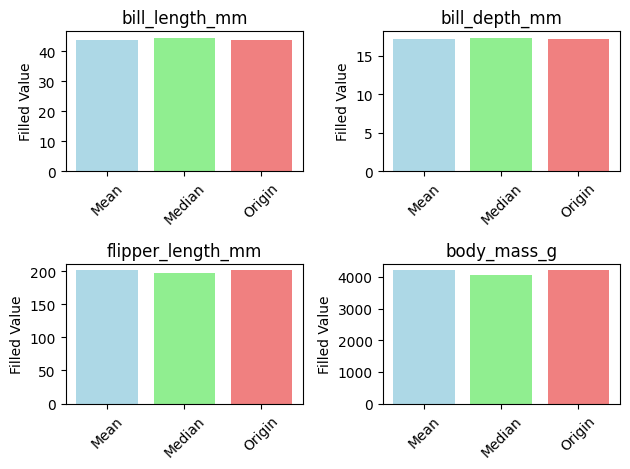

In [7]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for i, feature in enumerate(features):
    # Tính giá trị đã được fill vào
    mean_value = penguins_copy_mean[feature].mean()
    median_value = penguins_copy_median[feature].median()
    mean_origin = penguins[feature].mean()

    # Vẽ biểu đồ cho từng feature
    plt.subplot(2, 2, i + 1)  # 2 hàng, 2 cột
    plt.bar(['Mean', 'Median','Origin'], [mean_value, median_value,mean_origin], color=['lightblue', 'lightgreen','lightcoral'])
    plt.title(f'{feature}')
    plt.ylabel('Filled Value')
    plt.xticks(rotation=45)

plt.tight_layout()  # Đảm bảo các biểu đồ không chồng lên nhau
plt.show()

| x | Mean_method | Median_method  |
|-------|-------|-------|
| Định nghĩa |Là trung bình cộng <br> của các giá trị đó|là giá trị nằm ở giữa <br> của tập dữ liệu đã được sắp xếp|
| So sánh    |Mean bị chi phối bới các dữ liệu ngoại lệ<br>(một giá trị cực lớn hoặc<br>cực nhỏ sẽ ảnh hưởng rất nhiều) |Median ít bị ảnh hưởng bởi các giá trị ngoại lệ,<br> làm cho nó trở thành một chỉ số tốt hơn <br>trong các tập dữ liệu không đối xứng hoặc có ngoại lệ |
##### *<span style="color: #32CD32;">Trong trường hợp bộ dữ liệu này, các giá trị hầu như hội tụ tại các vùng vì thế giá trị trung bình (mean) và trung vị (median) không có sự khác biệt nhiều ***trong trường hợp này ta thấy mean sát với giá trị gốc hơn***</span>*

###### Using iterative method to fill missing data

In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

penguins_copy_iterative = penguins.copy()
print(penguins_copy_iterative.isna().sum())


mode_imputer = SimpleImputer(strategy='most_frequent')
penguins_copy_iterative['sex'] = mode_imputer.fit_transform(penguins_copy_iterative[['sex']]).flatten()

label_encoder = LabelEncoder()
penguins_copy_iterative['sex'] = label_encoder.fit_transform(penguins_copy_iterative[['sex']])

print(penguins_copy_iterative)

iterative_imputer = IterativeImputer(random_state=23521082)
# Danh sách các cột cần xử lý
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for feature in features:
    penguins_copy_iterative[feature] = iterative_imputer.fit_transform(penguins_copy_iterative[[feature]])

# Tạo DataFrame để biểu diễn kết quả
filled_values_df = pd.DataFrame(penguins_copy_iterative, columns=features)

# In bảng kết quả
filled_only_df = filled_values_df[penguins.isna()]
filled_only_df = filled_only_df.dropna(how='all')
# In bảng kết quả chỉ với các giá trị đã được fill
print("Filled Values Table (Only New Fills):")
print(filled_only_df)


#Thử phân phối cột sex bằng iterative imputer
penguins_copy_iterative_1 = penguins.copy()
label_encoder = LabelEncoder()

# Mã hóa cột 'sex' với LabelEncoder nhưng giữ nguyên NaN
label_encoder.fit(penguins_copy_iterative_1['sex'].dropna())
mask_notna = penguins_copy_iterative_1['sex'].notna()
penguins_copy_iterative_1.loc[mask_notna, 'sex'] = label_encoder.transform(penguins_copy_iterative_1.loc[mask_notna, 'sex'])
print("\n Penguins copy iterative 1: ")
print(penguins_copy_iterative_1)
# Sử dụng Iterative Imputer để điền giá trị cho cột 'sex'
penguins_copy_iterative_1['sex'] = iterative_imputer.fit_transform(penguins_copy_iterative_1[['sex']])
penguins_copy_iterative_1['sex'] = np.where(penguins_copy_iterative_1['sex'] > 0.5, 1, 0)


# Tạo DataFrame để biểu diễn các giá trị đã được điền vào cột 'sex'
filled_sex_df = pd.DataFrame(penguins_copy_iterative_1['sex'], columns=['sex'])

# Tạo DataFrame chứa các giá trị đã được điền vào từ dữ liệu gốc
filled_sex_only_df = filled_sex_df[penguins['sex'].isna()]

# In ra các giá trị đã được điền vào cột 'sex'
print("\nFilled Values for 'sex' Column in penguins_copy_iterative_1 for testing iterative imputer on sex feature:")
print(filled_sex_only_df)



species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8      

d:\Gradient\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### Chúng ta không nên sử dụng iterative_imputer cho sex vì nó <br>sẽ trả giá trị liên tục từ 0 đến 1 vì vậy cần dùng các phương pháp làm tròn để có thể sử dụng cách này

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26036\1015966405.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=penguins_copy_iterative, x='sex', palette='Set2')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26036\1015966405.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=penguins_copy_iterative_1, x='sex', palette='Set2')


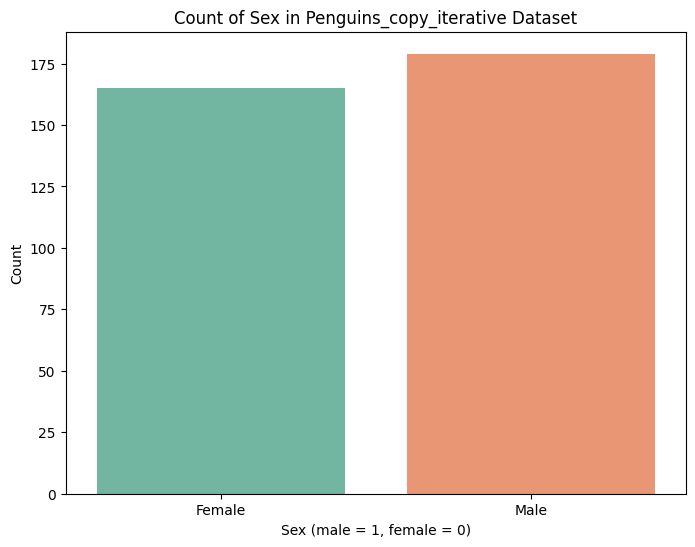

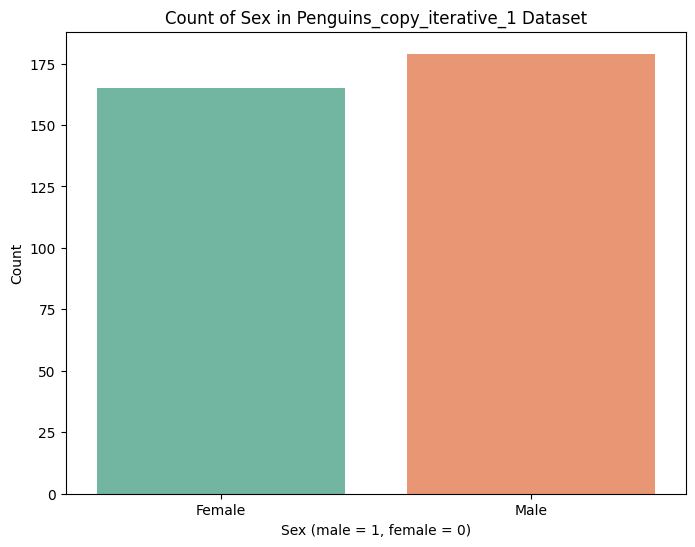

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(data=penguins_copy_iterative, x='sex', palette='Set2')
plt.title('Count of Sex in Penguins_copy_iterative Dataset')
plt.xlabel('Sex (male = 1, female = 0)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])


plt.figure(figsize=(8, 6))
sns.countplot(data=penguins_copy_iterative_1, x='sex', palette='Set2')
plt.title('Count of Sex in Penguins_copy_iterative_1 Dataset')
plt.xlabel('Sex (male = 1, female = 0)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

Kết quả như nhau khi sử dụng mode và iterative vì bộ data khá nhỏ và các missing data cũng không đủ nhiều

##### **Compare**

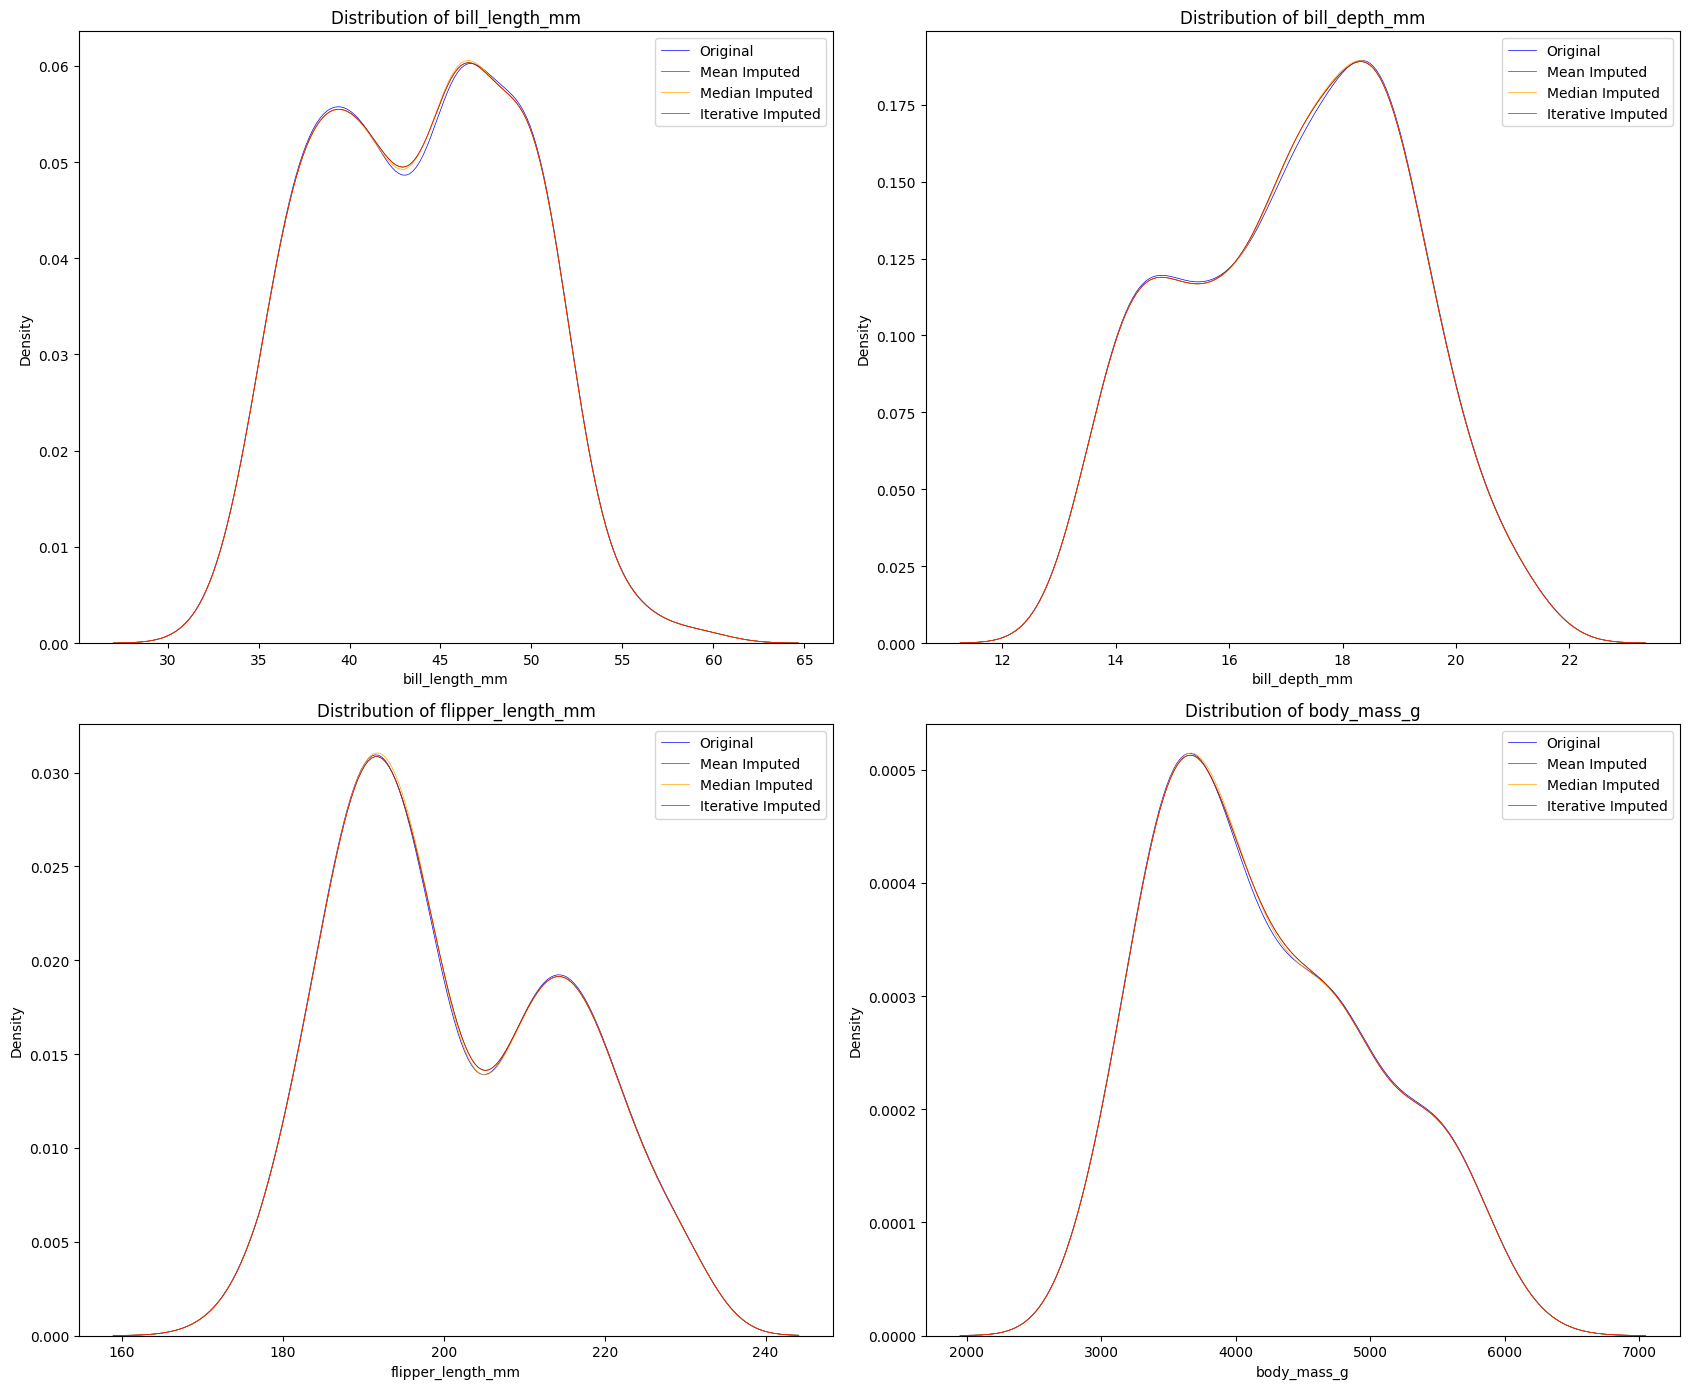

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(17, 14))

# Lặp qua từng feature và vẽ biểu đồ KDE cho 4 cách fill
for i, feature in enumerate(features):
    ax = axes[i // 2, i % 2]  # Chọn subplot

    # Vẽ KDE cho dữ liệu gốc
    sns.kdeplot(data=penguins, x=feature, label='Original', ax=ax, color='blue',linewidth=0.5)

    # Vẽ KDE cho dữ liệu fill với mean
    sns.kdeplot(data=penguins_copy_mean, x=feature, label='Mean Imputed', ax=ax, color='green',linewidth=0.5)

    # Vẽ KDE cho dữ liệu fill với median
    sns.kdeplot(data=penguins_copy_median, x=feature, label='Median Imputed', ax=ax, color='orange',linewidth=0.5)

    # Vẽ KDE cho dữ liệu fill với iterative
    sns.kdeplot(data=penguins_copy_iterative, x=feature, label='Iterative Imputed', ax=ax, color='red',linewidth=0.5)

    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()


#### Nhận xét ####
Phương pháp Iterative Imputer là một kỹ thuật điền dữ liệu bị thiếu bằng cách sử dụng mô hình hồi quy đa biến. Nó hoạt động bằng cách lần lượt dự đoán các giá trị bị thiếu trong từng cột dựa trên các cột còn lại.<br>
|Ưu điểm|Nhược điểm|
|-------|----------|
|Sử dụng thông tin Từ Nhiều Feature<br>(sử dụng tất cả các cột có sẵn <br>để điền giá trị thiếu cho một cột cụ thể)|Thời gian tính toán lâu<br> Cần phải chọn mô hình phù hợp cho dữ liệu|
#### **Theo các đồ thị trên thì các phương pháp đều cho ra các kết quả gần giống nhau và sát với phân bố của dữ liệu gốc nên model ở dưới sẽ chạy một 1 dữ liệu bất kì chứ không demo tất cả**

## Count features in text format


In [11]:
# Count 
lalel_count_island = penguins_copy_mean["island"].value_counts()
lalel_count_sex = penguins_copy_mean["sex"].value_counts()
lalel_count_species = penguins_copy_mean["species"].value_counts()

# DataFrame
table_island = pd.DataFrame(lalel_count_island).reset_index()
table_island.columns = ['Island', 'Count']

table_sex = pd.DataFrame(lalel_count_sex).reset_index()
table_sex.columns = ['Sex', 'Count']

table_species = pd.DataFrame(lalel_count_species).reset_index()
table_species.columns = ['Species', 'Count']


print("Table: Island")
print(table_island)
print("\nTable: Sex (1: male) (0: female)")
print(table_sex)
print("\nTable: Species")
print(table_species)


Table: Island
      Island  Count
0     Biscoe    168
1      Dream    124
2  Torgersen     52

Table: Sex (1: male) (0: female)
   Sex  Count
0    1    179
1    0    165

Table: Species
     Species  Count
0     Adelie    152
1     Gentoo    124
2  Chinstrap     68


## **Data visualization**


### Visualize the data into a 2D plot with features paired with each other one by one

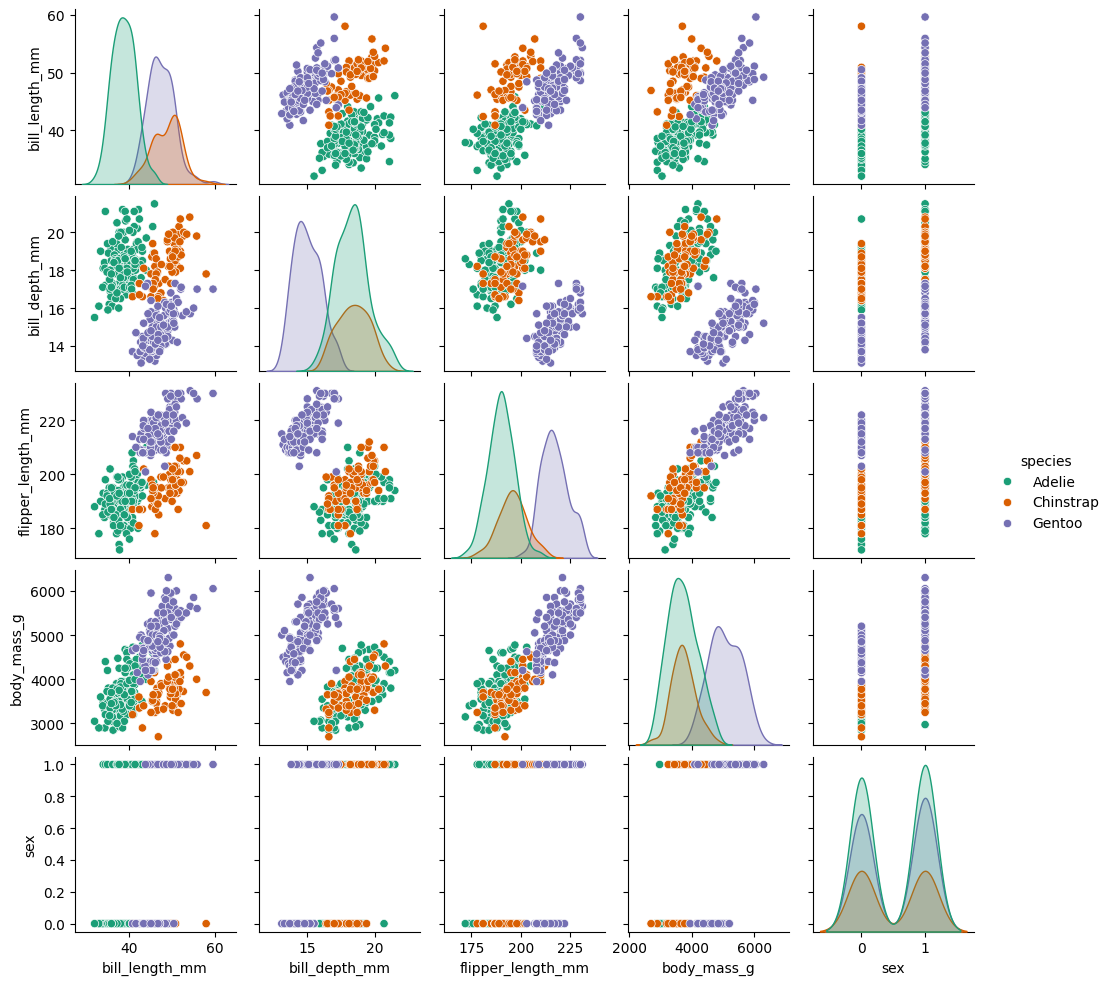

In [12]:
sns.pairplot(penguins_copy_mean,hue="species",palette="Dark2",height=2,diag_kind='kde')
plt.show()

### Visualize island and species

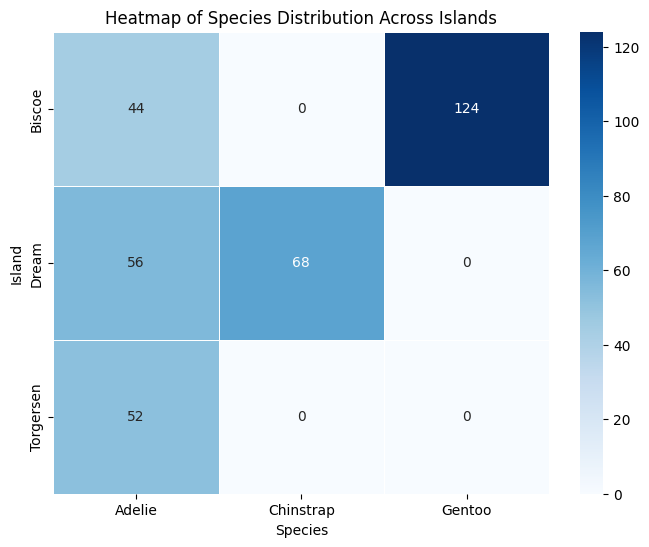

In [13]:
island_species_count = penguins_copy_mean.groupby(['island', 'species']).size().unstack(fill_value=0)

# Tạo biểu đồ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(island_species_count, annot=True, cmap='Blues', linewidths=0.5,fmt='d')
plt.title('Heatmap of Species Distribution Across Islands')
plt.xlabel('Species')
plt.ylabel('Island')


plt.show()

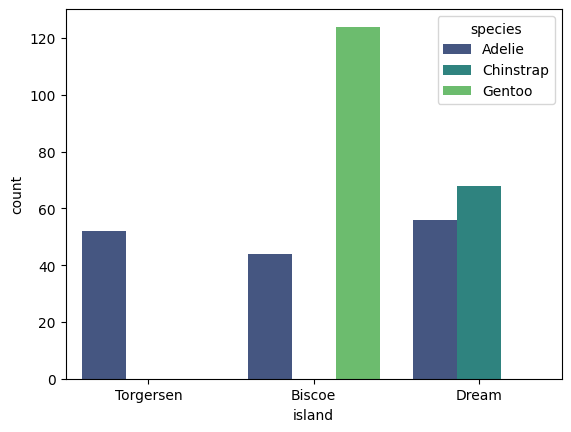

In [14]:
sns.countplot(data=penguins,x='island',hue='species',palette='viridis')
plt.show()

### Decision Tree for Penguins_copy_mean

Encode island feature by using Label Encoder

In [15]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

# Giả sử bạn đã có DataFrame penguins với các cột cần thiết
label_encoder = LabelEncoder()

# Mã hóa island 
penguins_copy_mean['island_encoded'] = label_encoder.fit_transform(penguins_copy_mean['island'])
penguins_copy_mean

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_encoded
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,1,2
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,0,2
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,0,2
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,1,2
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,0,2
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,1,0
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,0,0
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,1,0
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,0,0


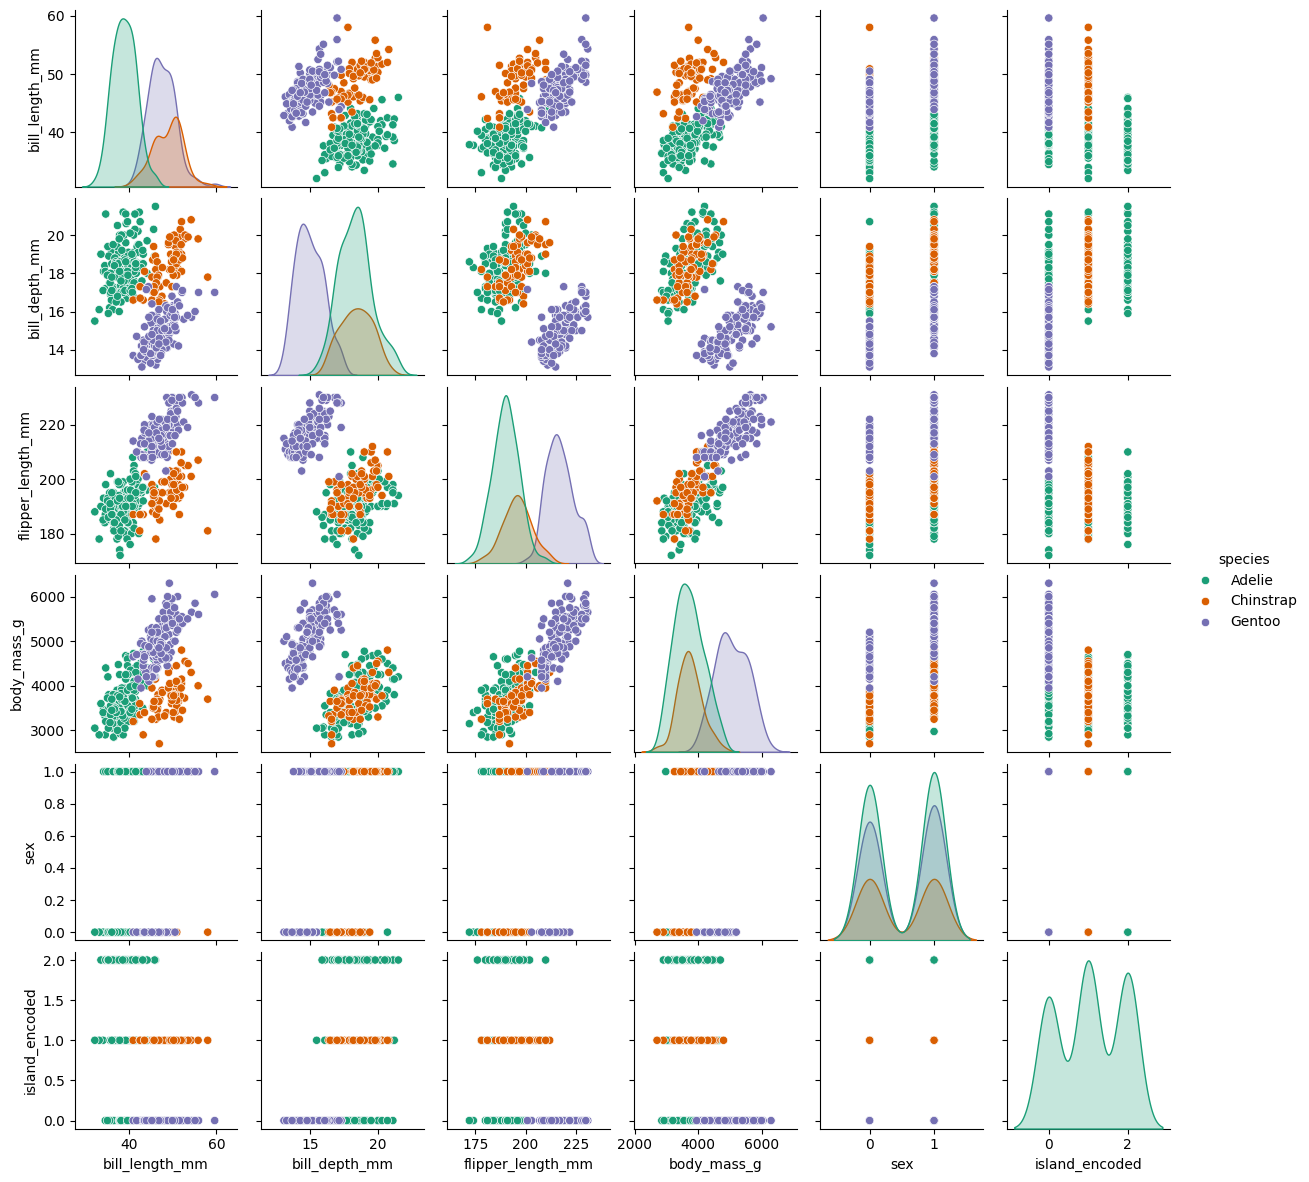

In [16]:
sns.pairplot(penguins_copy_mean,hue="species",palette="Dark2",height=2,diag_kind='kde')
plt.show()

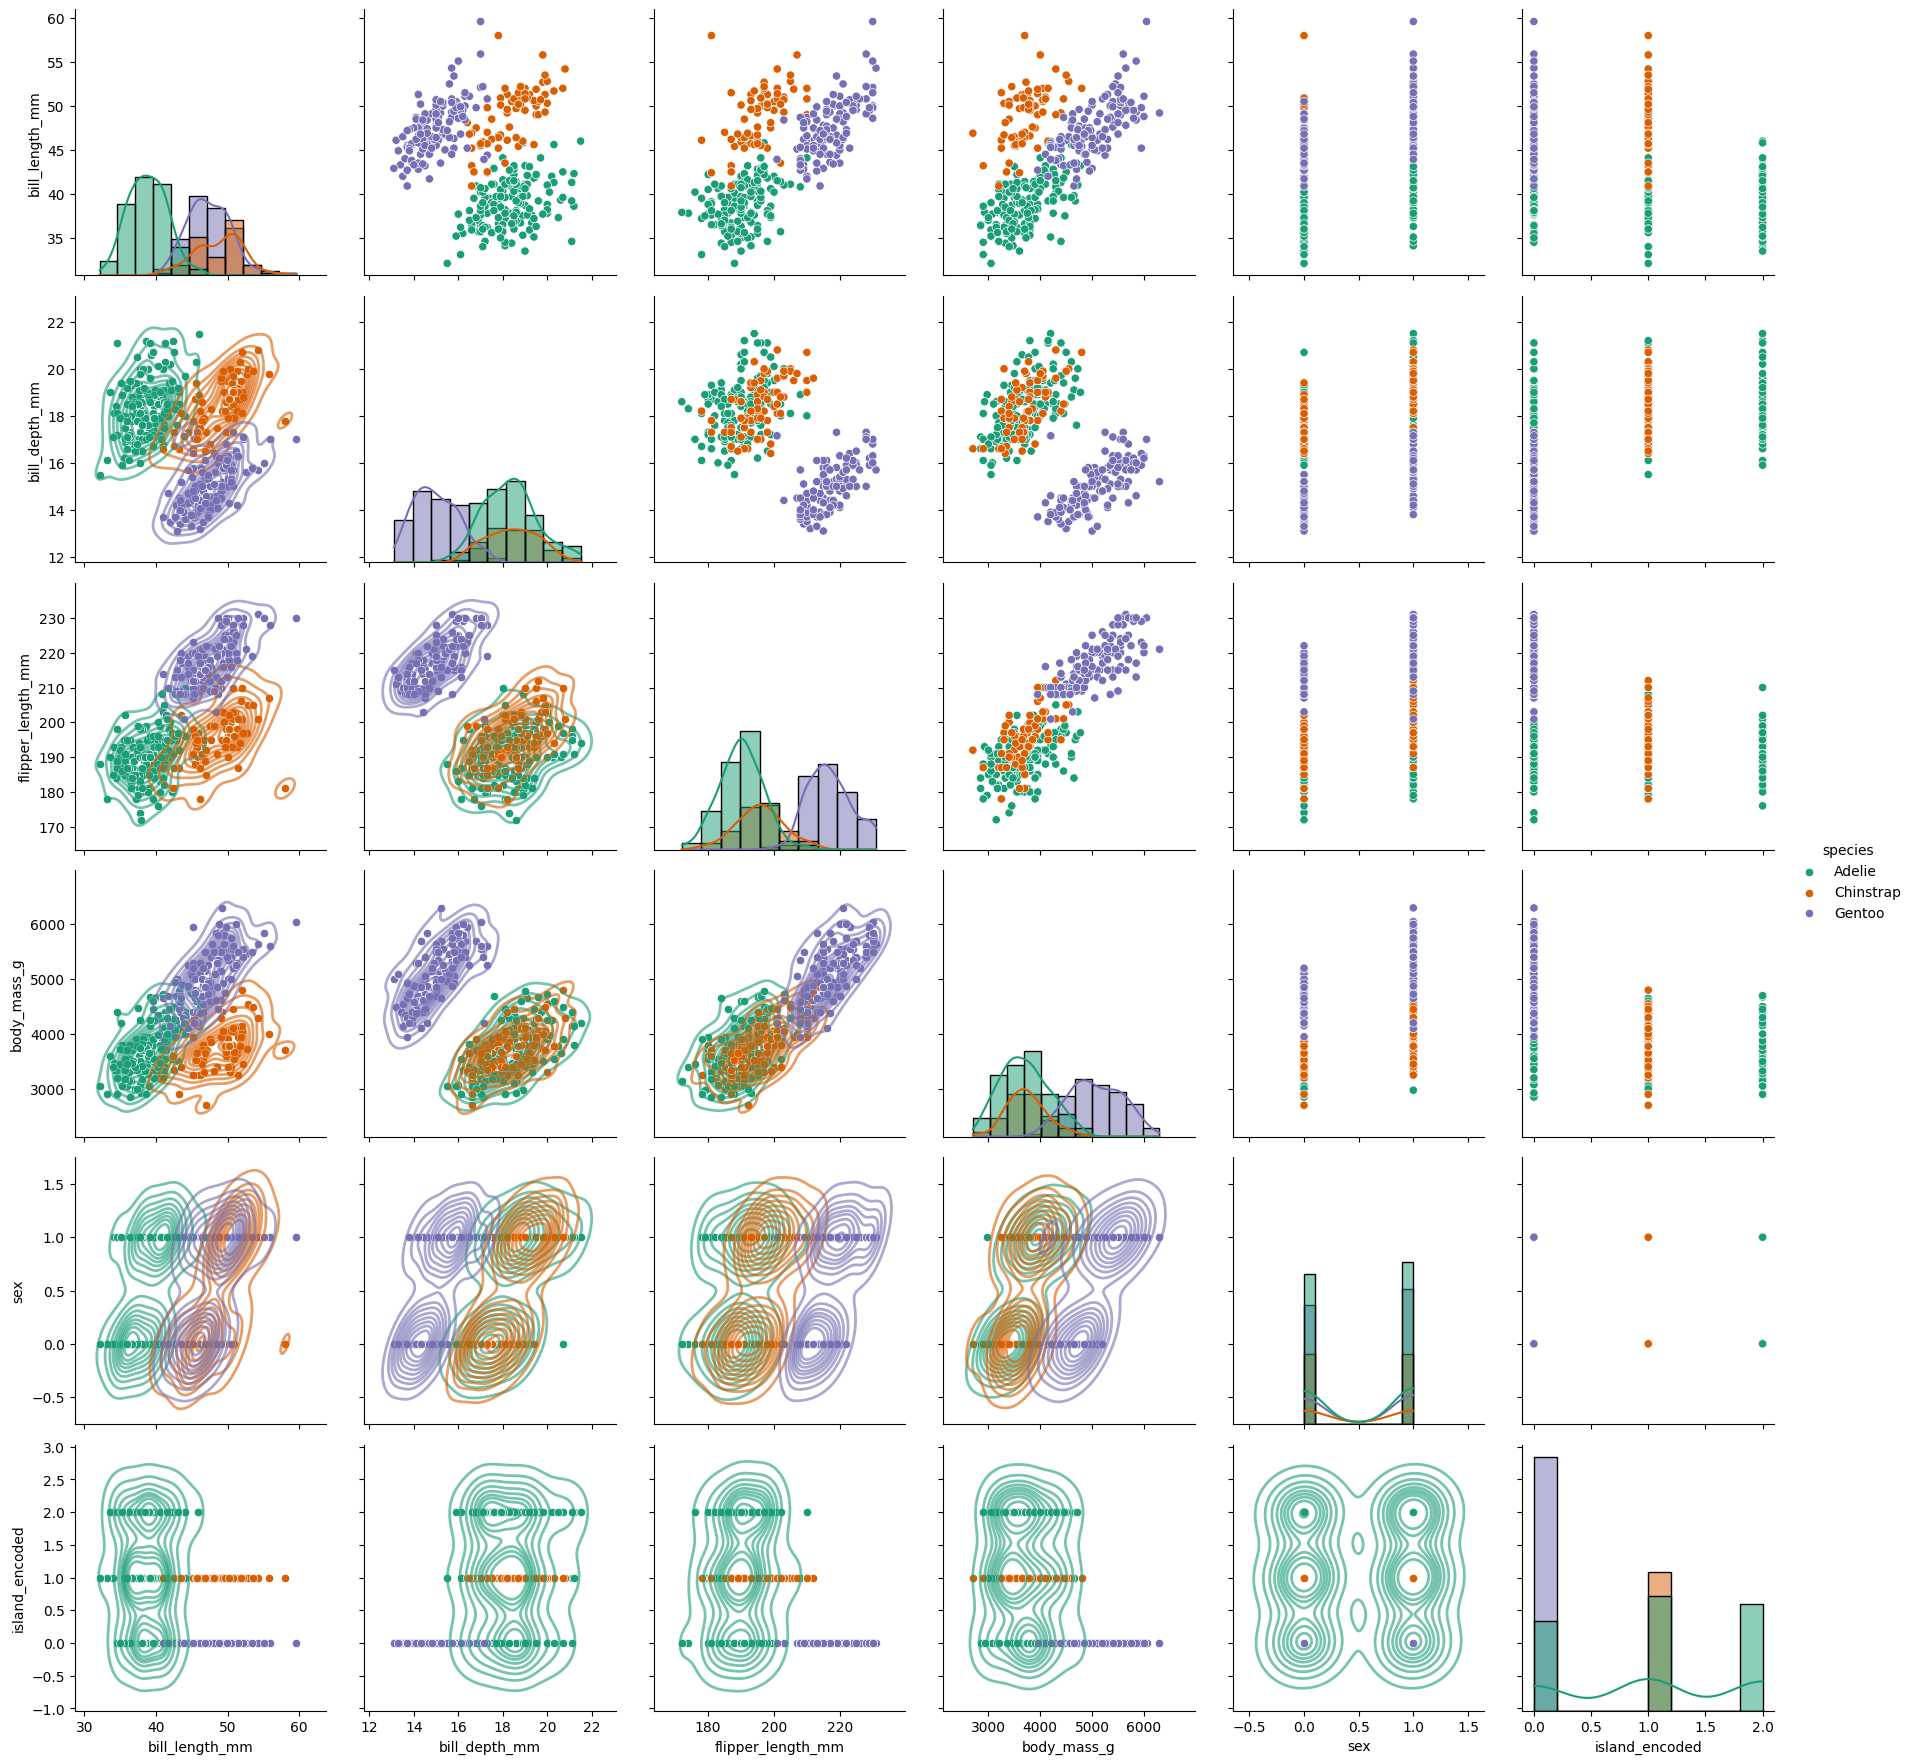

In [17]:
import warnings
warnings.filterwarnings("ignore")
def scatter_kde(x, y, **kwargs):
    # Vẽ biểu đồ phân tán
    sns.scatterplot(x=x, y=y, **kwargs)
    # Vẽ biểu đồ KDE
    sns.kdeplot(x=x, y=y, fill=False, alpha=0.6, linewidths=2, **kwargs)

# Tạo PairGrid
g = sns.PairGrid(penguins_copy_mean, hue='species', palette='Dark2', height=3)
g.map_upper(sns.scatterplot)  # Biểu đồ phân tán cho phần trên
g.map_diag(sns.histplot, kde=True)  # Histogram với KDE cho đường chéo
g.map_lower(scatter_kde)  # Sử dụng hàm tùy chỉnh cho phần dưới
g.add_legend()
plt.show()


Cho max_depth = 2 với mô hình cây cây quyết định và kiểm nghiệm


Accuracy: 0.8173077
Confusion Matrix:


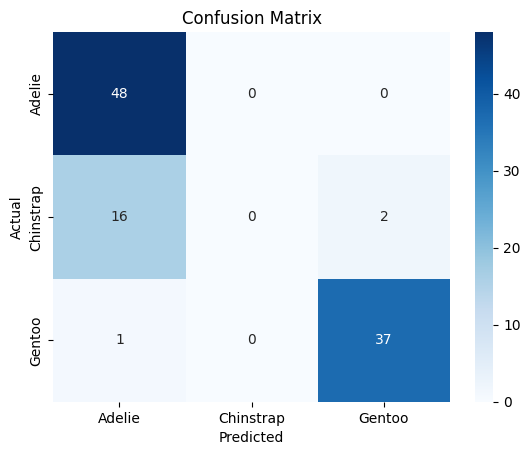

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Define features and target variable
X = penguins_copy_mean[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island_encoded', 'sex']]
y = penguins_copy_mean['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23521082)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=23521082,max_depth=1)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.7f}')  

# Print confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

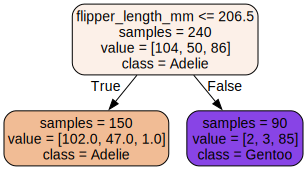

In [55]:
from graphviz import Source
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file='penguin_tree.dot', feature_names=X_train.columns, class_names=clf.classes_, impurity=False,
                filled=True, rounded=True)

# Visualize the decision tree
graph = Source.from_file('penguin_tree.dot')
graph

Cho max_depth không giới hạn và kiểm nghiệm

Accuracy: 0.9711538
Confusion Matrix:


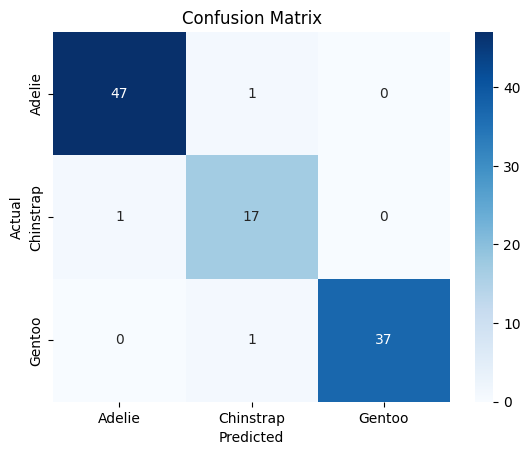

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Tạo mô hình cây quyết định với max_depth lớn hoặc không giới hạn
model = DecisionTreeClassifier(max_depth=None, ccp_alpha=0.01, random_state=23521082)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.7f}')  


# Print confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

['Adelie' 'Chinstrap' 'Gentoo']


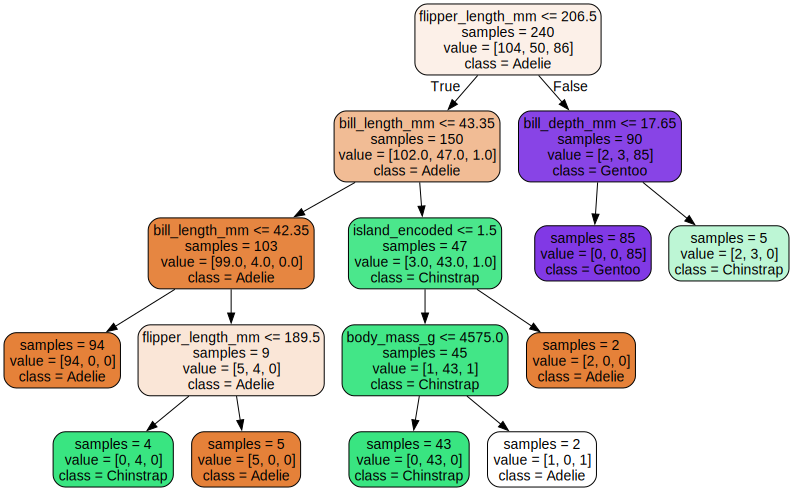

In [21]:
export_graphviz(model, out_file='penguin_tree.dot', feature_names=X_train.columns, class_names=model.classes_, impurity=False,
                filled=True, rounded=True)
print(model.classes_)
# Visualize the decision tree
graph = Source.from_file('penguin_tree.dot')
graph

Tuy max_depth = none có độ chính xác cao hơn max_depth = 2 nhưng gặp vấn đề là overfitting vì nó quá sát với tập dữ liệu train. Và vì tập train và tập test có số lượng quá nhỏ nên độ chính xác lại cao đến như vậy. 

#### Chạy thử thuật giải GridSearch cho cây quyết định 
Giải thích về cơ chế GridSearchCV:
- Thuật giải sẽ chạy lần lượt các `max_depth` khác nhau rồi quyết định cái nào là `best_max_depth` của mô hình này.
- Thông thường ta sẽ cho giá trị ngẫu nhiên trong khoảng từ [2,10] để kiểm nghiệm, nhưng em có tìm ra được một cách để biết được khoảng giới hạn này của mô hình là tìm min($\log_2{(X_{train})}$, số features trên `X_train`).
##### ***Điểm đặc biệt của GridSearchCV***
- Với tham số cv=n (cross validation) sẽ chia tập X_train ra làm n folds (1 phần dữ liệu làm tập validation và còn lại dùng để train) <br> và quá trình này lặp lại n lần sau đó accuracy của tập X_train sẽ được tính trên giá trị trung bình sau n lần lặp với mỗi depth khác nhau

log2(n) = 7.906890595608519
p = 6
min = 6


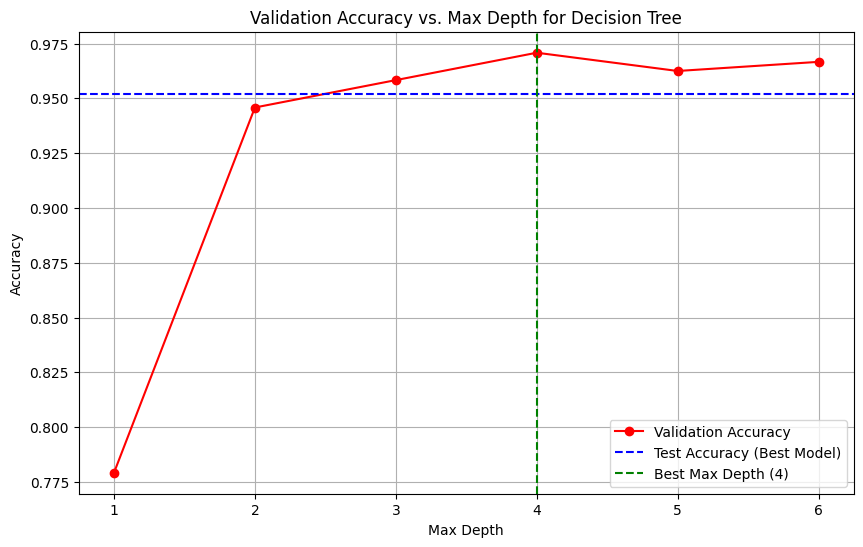

Test Accuracy của mô hình tốt nhất (max_depth=4): 0.95192
Confusion Matrix:


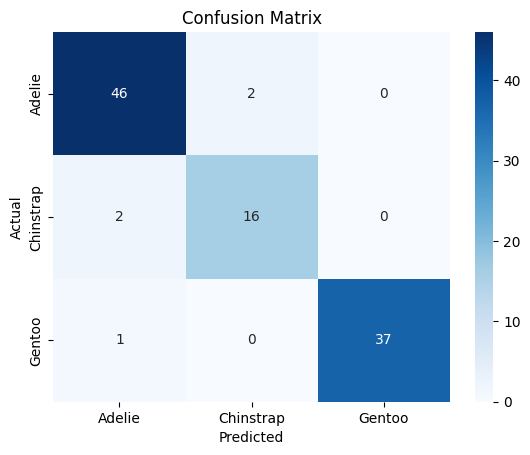

In [31]:
from sklearn.model_selection import GridSearchCV

max_depth_samples = np.log2(len(X_train))
print("log2(n) =", max_depth_samples)
max_depth_features = X_train.shape[1]
print("p =", max_depth_features)
max_depth_max = int(min(max_depth_samples, max_depth_features))
print("min =", max_depth_max)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


model = DecisionTreeClassifier()

# Định nghĩa tham số tìm kiếm
param_grid = {'max_depth': range(1, max_depth_max + 1)}

# Sử dụng GridSearchCV để tìm max_depth tốt nhất
grid_search = GridSearchCV(model, param_grid, cv=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Lấy kết quả
results = grid_search.cv_results_

# Lấy các giá trị max_depth và tương ứng với độ chính xác trung bình
max_depths = results['param_max_depth'].data
mean_test_scores = results['mean_test_score']

# Huấn luyện mô hình tốt nhất và dự đoán trên X_test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Tính độ chính xác cho mô hình tốt nhất
test_accuracy = accuracy_score(y_test, y_pred)

# Vẽ đồ thị độ chính xác
plt.figure(figsize=(10, 6))
plt.plot(max_depths, mean_test_scores, marker='o', label='Validation Accuracy', color='red')
plt.axhline(y=test_accuracy, color='blue', linestyle='--', label='Test Accuracy (Best Model)')
plt.axvline(x=grid_search.best_params_["max_depth"], color='green', linestyle='--', label=f'Best Max Depth ({grid_search.best_params_["max_depth"]})')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs. Max Depth for Decision Tree')
plt.legend()
plt.grid(True)
plt.xticks(max_depths)
plt.show()


# In ra độ chính xác của mô hình tốt nhất
# In thêm giá trị max_depth từ best_model (trên tập test)
print(f'Test Accuracy của mô hình tốt nhất (max_depth={grid_search.best_params_["max_depth"]}): {test_accuracy:.5f}')


print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

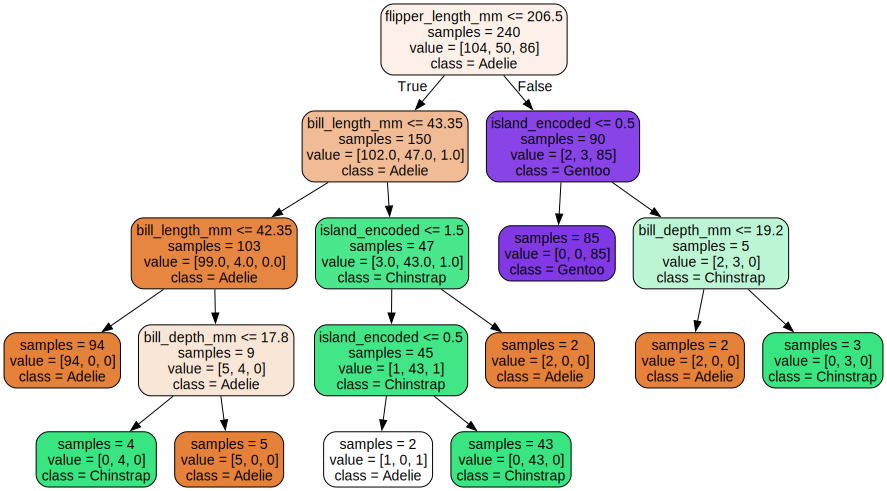

In [32]:
export_graphviz(best_model, out_file='penguin_tree.dot', feature_names=X_train.columns, class_names=best_model.classes_, impurity=False,
                filled=True, rounded=True)

# Visualize the decision tree
graph = Source.from_file('penguin_tree.dot')
graph

- Validation accuracy là độ chính xác tính trên tập train và độ chính xác cao nhất ở độ sâu (depth=4) tuy nhiên độ chính xác thực tế chỉ có 0.95192 và nó cắt ngang độ sâu khoảng (2-3) <br>
- Thử vẽ cây quyết định <br>
- Ta thấy rằng một lần nữa mô hình bị overfitting với max_depth = 4
=> Theo em tìm hiểu, parameter cv ảnh hưởng lớn đến độ chính xác này và cv càng lớn thì tập dữ liệu càng được chia nhiều hơn và có thể đánh giá đúng hơn. Ta thử đổi tham số cv
##### `Note`: *Các lần chạy khác nhau sẽ cho ra những best_max_depth khác nhau tuy nhiên đều bị overfitting=> không ổn định*

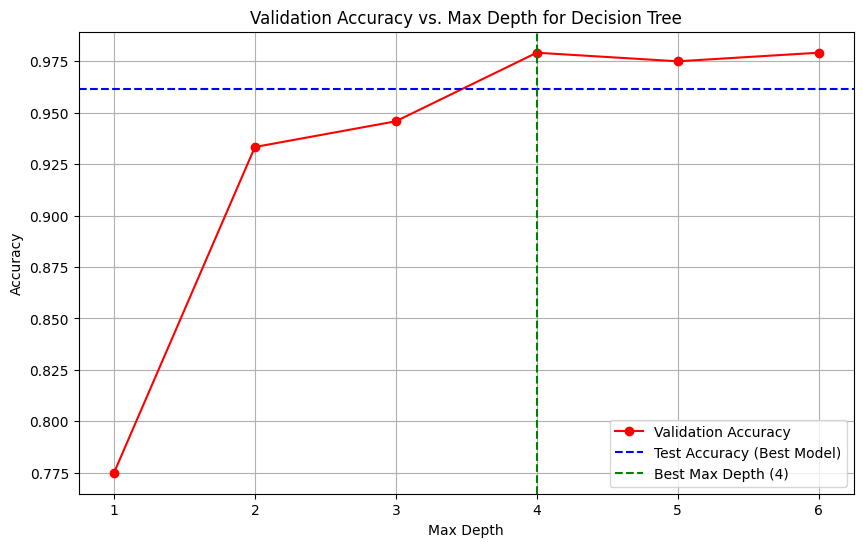

Test Accuracy của mô hình tốt nhất (max_depth=4): 0.96154


In [37]:
model = DecisionTreeClassifier()

# Định nghĩa tham số tìm kiếm
param_grid = {'max_depth': range(1, max_depth_max + 1)}

# Sử dụng GridSearchCV để tìm max_depth tốt nhất
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Lấy kết quả
results = grid_search.cv_results_

# Lấy các giá trị max_depth và tương ứng với độ chính xác trung bình
max_depths = results['param_max_depth'].data
mean_test_scores = results['mean_test_score']

# Huấn luyện mô hình tốt nhất và dự đoán trên X_test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Tính độ chính xác cho mô hình tốt nhất
test_accuracy = accuracy_score(y_test, y_pred)

# Vẽ đồ thị độ chính xác
plt.figure(figsize=(10, 6))
plt.plot(max_depths, mean_test_scores, marker='o', label='Validation Accuracy', color='red')
plt.axhline(y=test_accuracy, color='blue', linestyle='--', label='Test Accuracy (Best Model)')
plt.axvline(x=grid_search.best_params_["max_depth"], color='green', linestyle='--', label=f'Best Max Depth ({grid_search.best_params_["max_depth"]})')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs. Max Depth for Decision Tree')
plt.legend()
plt.grid(True)
plt.xticks(max_depths)
plt.show()


# In ra độ chính xác của mô hình tốt nhất
# In thêm giá trị max_depth từ best_model (trên tập test)
print(f'Test Accuracy của mô hình tốt nhất (max_depth={grid_search.best_params_["max_depth"]}): {test_accuracy:.5f}')

Như ta thấy ở đây khi đổi cv tình trạng vẫn tương tự cho thấy dù tăng cv lên nhưng độ hiệu quả là không. 
<br> Theo em nghĩ là do bộ dữ liệu của chúng ta quá nhỏ dẫn đến càng tăng cv thì các fold càng nhỏ dẫn đến quá specific => càng dễ overfitting
<br> Đề xuất `giải pháp`: cho thêm tham số `min_samples_leaf` để định giá trị tối thiểu mẫu mà mỗi node lá cần có


best_model:  DecisionTreeClassifier(max_depth=2, min_samples_leaf=7)


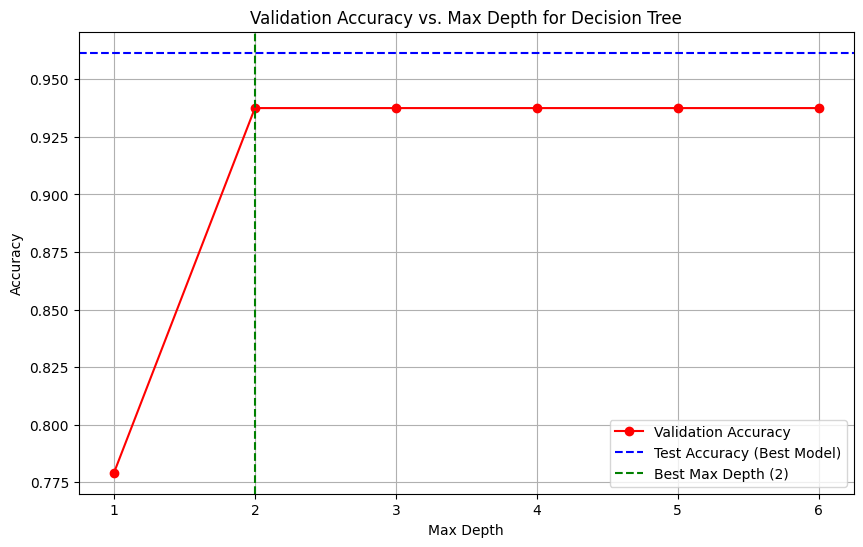

Test Accuracy của mô hình tốt nhất (max_depth=2): 0.96154


In [63]:
model = DecisionTreeClassifier(min_samples_leaf = 7) # Định nghĩa mô hình với min_samples_leaf = 7

# Định nghĩa tham số tìm kiếm
param_grid = {'max_depth': range(1, max_depth_max + 1)}

# Sử dụng GridSearchCV để tìm max_depth tốt nhất
grid_search = GridSearchCV(model, param_grid, cv=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Lấy kết quả
results = grid_search.cv_results_

# Lấy các giá trị max_depth và tương ứng với độ chính xác trung bình
max_depths = results['param_max_depth'].data
mean_test_scores = results['mean_test_score']

# Huấn luyện mô hình tốt nhất và dự đoán trên X_test
best_model = grid_search.best_estimator_
print("best_model: ",best_model)
y_pred = best_model.predict(X_test)

# Tính độ chính xác cho mô hình tốt nhất
test_accuracy = accuracy_score(y_test, y_pred)

# Vẽ đồ thị độ chính xác
plt.figure(figsize=(10, 6))
plt.plot(max_depths, mean_test_scores, marker='o', label='Validation Accuracy', color='red')
plt.axhline(y=test_accuracy, color='blue', linestyle='--', label='Test Accuracy (Best Model)')
plt.axvline(x=grid_search.best_params_["max_depth"], color='green', linestyle='--', label=f'Best Max Depth ({grid_search.best_params_["max_depth"]})')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs. Max Depth for Decision Tree')
plt.legend()
plt.grid(True)
plt.xticks(max_depths)
plt.show()


# In ra độ chính xác của mô hình tốt nhất
# In thêm giá trị max_depth từ best_model (trên tập test)
print(f'Test Accuracy của mô hình tốt nhất (max_depth={grid_search.best_params_["max_depth"]}): {test_accuracy:.5f}')


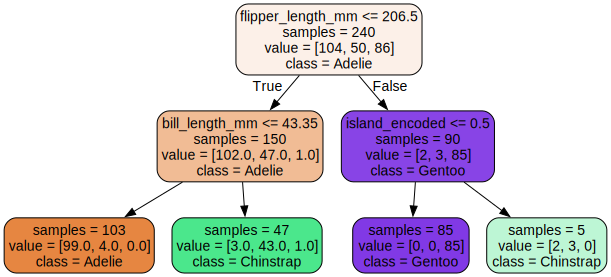

In [53]:
export_graphviz(best_model, out_file='penguin_tree.dot', feature_names=X_train.columns, class_names=best_model.classes_, impurity=False,
                filled=True, rounded=True)

# Visualize the decision tree
graph = Source.from_file('penguin_tree.dot')
graph

Ta thấy các validation accuracy giảm đáng kể (có thể ví von như loss) tuy nhiên test accuracy vẫn cao do bộ data quá nhỏ 
<br> (vì em thử chạy depth = 1 và $accuracy \approx 80% $)
<br> Tuy nhiên `max_depth = 2` + `test accuracy = 0.96154` là khá lý tưởng 

`note`: em có thể điều chỉnh đồng thời chỉ số `cv` và `min_samples_leaf` để điều chỉnh được độ cao max của cây 
<br> (dĩ nhiên phải phụ thuộc vào tính chất bộ data vì không thể điều chỉnh theo chủ ý của mình để ra được kết quả mong muốn)